In [82]:
from scipy.fft import fft, ifft
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'time': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'value': np.sin(np.linspace(0, 10 * np.pi, 100)) + np.random.normal(0, 0.1, 100)
})
df.head()

,time,value
0,2020-01-01,0.043784
1,2020-01-02,0.268760
2,2020-01-03,0.630492
3,2020-01-04,0.606827
4,2020-01-05,0.964746


In [83]:
y = df['value'].values
n = len(y)

# Frequency domain
yf = fft(y)

k = 10  # number of harmonics to keep
indices = np.argsort(np.abs(yf))[-k:]  # indices of top-k components

# Zero out all except top-k
filtered = np.zeros_like(yf)
filtered[indices] = yf[indices]

In [84]:
# Create extended time array
n_forecast = 50  # how many future points
N = n + n_forecast
t = np.arange(N)

# Reconstruct signal manually
reconstructed = np.zeros(N)

for i in indices:
    amplitude = np.abs(yf[i]) / n
    phase = np.angle(yf[i])
    freq = 2 * np.pi * i / n
    reconstructed += amplitude * np.cos(freq * t + phase)


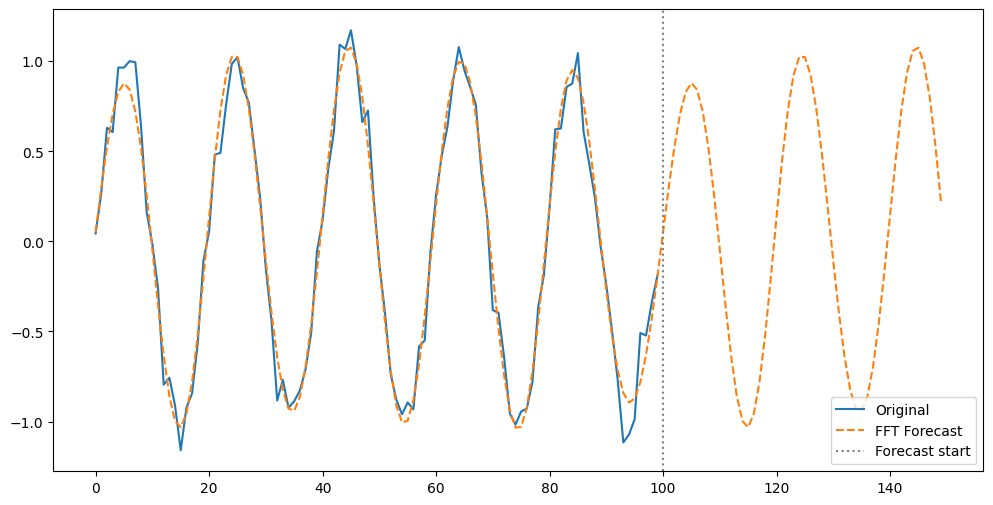

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n), y, label='Original')
plt.plot(t, reconstructed, label='FFT Forecast', linestyle='--')
plt.axvline(n, color='gray', linestyle=':', label='Forecast start')
plt.legend()
plt.show()

# FFT on Cyber

In [86]:
import pandas as pd
#import matplotlib.pyplot as plt
from utils import preprocess

df = pd.read_csv('data/01_input_history.csv')
df.head()

df_train_null, df_train_inactive, df_train_active, df_validation = preprocess.preprocess_ex1(df)

In [87]:
def fft_forecast(series, n_forecast=12, top_k=20):
    """
    Forecast future values using FFT.
    
    Parameters:
        series: pd.Series of values (Quantity)
        n_forecast: int, number of future points to predict
        top_k: int, number of Fourier components to keep
    
    Returns:
        np.array of forecasted values
    """
    y = series.values
    n = len(y)
    
    # Edge case: not enough data
    if n < top_k + 1:
        return np.full(n_forecast, np.nan)

    yf = fft(y)
    indices = np.argsort(np.abs(yf))[-top_k:]

    t = np.arange(n + n_forecast)
    forecast = np.zeros(len(t))

    for i in indices:
        amplitude = np.abs(yf[i]) / n
        phase = np.angle(yf[i])
        freq = 2 * np.pi * i / n
        forecast += amplitude * np.cos(freq * t + phase)

    return forecast[n:]

In [88]:
df_validation['ForecastFFT'] = 0.0

In [89]:
for uid, group in df_train_active.groupby('unique_id'):
    group = group.sort_values('ds')
    
    quantity = group['Quantity']
    
    forecast = fft_forecast(quantity, n_forecast=12, top_k=3)
    df_validation.loc[df_validation['unique_id'] == uid, 'ForecastFFT'] = forecast

In [90]:
df_validation['ForecastFFT'] = df_validation['ForecastFFT'].astype(int)

In [91]:
def restore_original_format(date_column):
    return date_column.dt.strftime('%b%Y')
df_validation['Month'] = restore_original_format(df_validation['ds'])

In [96]:
df_validation.head(50)

,unique_id,ds,Quantity,Country,Product,ForecastFFT,Month
0,Japan_MorningMint,2023-01-01,0,Japan,MorningMint,0,Jan2023
1,Japan_MorningMint,2023-02-01,0,Japan,MorningMint,0,Feb2023
2,Japan_MorningMint,2023-03-01,0,Japan,MorningMint,0,Mar2023
3,Japan_MorningMint,2023-04-01,0,Japan,MorningMint,0,Apr2023
4,Japan_MorningMint,2023-05-01,0,Japan,MorningMint,0,May2023
5,Japan_MorningMint,2023-06-01,0,Japan,MorningMint,0,Jun2023
6,Japan_MorningMint,2023-07-01,0,Japan,MorningMint,0,Jul2023
7,Japan_MorningMint,2023-08-01,0,Japan,MorningMint,0,Aug2023
8,Japan_MorningMint,2023-09-01,0,Japan,MorningMint,0,Sep2023
9,Japan_MorningMint,2023-10-01,0,Japan,MorningMint,0,Oct2023


In [ ]:
df_validation[['Quantity','Country','Product','Month']].to_csv('submissions/validation_FFT.csv', index=False)

df_forecastFFT = df_validation[['ForecastFFT','Country','Product','Month']].copy()
df_forecastFFT.rename(columns={'ForecastFFT': 'Quantity'}, inplace=True)
df_forecastFFT[['Quantity','Country','Product','Month']].to_csv('submissions/submission_FFT.csv', index=False)